# Event Time

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
NFP = {"Non Farm Payrolls":[
        "2023-01-06 21:30:00",
        "2023-02-03 21:30:00",
        "2023-03-03 21:30:00",
        "2023-04-07 20:30:00",
        "2023-05-08 20:30:00",
        "2023-06-02 20:30:00",
        "2023-07-07 20:30:00",
        "2023-08-04 20:30:00",
        "2023-09-01 20:30:00",
        "2023-10-06 20:30:00",
        "2023-11-03 20:30:00",
        "2023-12-01 21:30:00"]}

CPI = {"The Cumsumer Price Index":[
        "2023-01-12 21:30:00",
        "2023-02-14 21:30:00",
        "2023-03-14 20:30:00",
        "2023-04-12 20:30:00",
        "2023-05-10 20:30:00",
        "2023-06-13 20:30:00",
        "2023-07-12 20:30:00",
        "2023-08-10 20:30:00",
        "2023-09-13 20:30:00",
        "2023-10-12 20:30:00",
        "2023-11-14 21:30:00",
        "2023-12-12 21:30:00"]}

FOMC = {'FOMC': ["2023-02-03 02:00:00",
"2023-03-17 02:00:00",
"2023-05-05 02:00:00",
"2023-06-16 02:00:00",
"2023-07-28 02:00:00",
"2023-09-22 02:00:00",
"2023-11-03 02:00:00",
"2023-12-15 02:00:00"]}

In [3]:
EventDf = pd.concat([pd.DataFrame(NFP), pd.DataFrame(CPI), pd.DataFrame(FOMC)], axis=1)

In [4]:
EventDf.to_excel('eventTime.xlsx')

In [5]:
eventBtcDf = pd.read_csv('btcEvent.csv')
eventEthDf = pd.read_csv('ethEvent.csv')

In [7]:
eventBtcDf.tail()

,date,netPnl,slippage,commission,turnover,tradeCount,tradingPnl,positionPnl,totalPnl,balance,return,retWithoutFee,highlevel,drawdown,ddPercent
1689,2023-01-15,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.131050e+07,0.0,0.0,1.131050e+07,0.0,0.0
1690,2023-01-16,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.131050e+07,0.0,0.0,1.131050e+07,0.0,0.0
1691,2023-01-17,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.131050e+07,0.0,0.0,1.131050e+07,0.0,0.0
1692,2023-01-18,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.131050e+07,0.0,0.0,1.131050e+07,0.0,0.0
1693,2023-01-19,0.0,0,0.0,0.0,0,0.0,0.0,0.0,1.131050e+07,0.0,0.0,1.131050e+07,0.0,0.0


In [8]:
eventBtcDf.index = list(map(lambda dt: datetime.strptime(dt, '%Y-%m-%d'), eventBtcDf.date))
eventEthDf.index = list(map(lambda dt: datetime.strptime(dt, '%Y-%m-%d'), eventEthDf.date))

In [9]:
# eventBtcDf

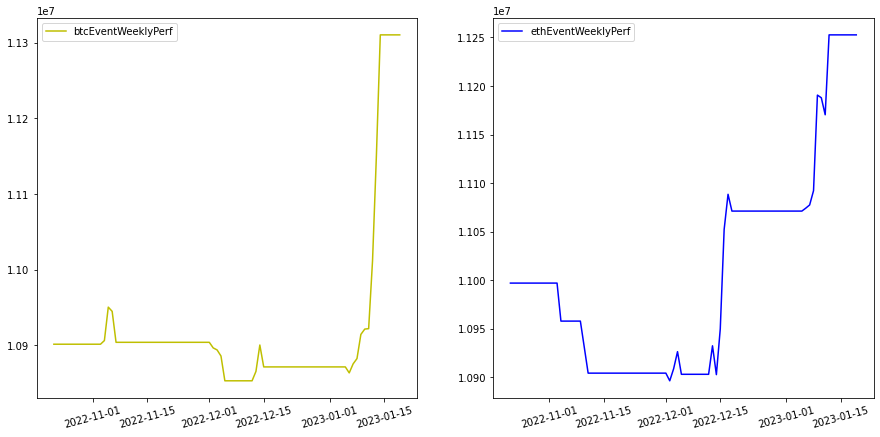

In [30]:
#plot 1:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.plot(eventBtcDf.balance.iloc[-90:], label='btcEventWeeklyPerf', color='y')
plt.legend()
plt.xticks(rotation=15)


#plot 2:
plt.subplot(1, 2, 2)
plt.plot(eventEthDf.balance.iloc[-90:], label='ethEventWeeklyPerf', color='b')
plt.legend()
plt.xticks(rotation=15)
plt.savefig('eventDrivenPerf')
plt.show()

In [31]:
eventMonthlyReturn = pd.Series({"btcEventMonthlyReturn:" : str(round((eventBtcDf.balance.iloc[-1]/eventBtcDf.balance.iloc[-30]-1)*100,2))+'%', 
 "ethEventMonthlyReturn:" : str(round(((eventEthDf.balance.iloc[-1]/eventEthDf.balance.iloc[-30]-1)*100),2))+"%"})

In [32]:
eventMonthlyReturn.to_frame(name='eventPerf').to_excel('eventMonthlyReturn.xlsx')

In [33]:
eventMonthlyReturn

btcEventMonthlyReturn:    4.04%
ethEventMonthlyReturn:    1.64%
dtype: object